# The Analysis

Begin by opening `cleaned.csv`. Make sure we can see all of the columns.

In [1]:
import pandas as pd

df = pd.read_csv('cleaned.csv')

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31 00:00:00
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,...,1.0,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22 00:00:00
2,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,62,NaN,A9,44 BAY 13TH STREET,NaN,...,1.0,0.0,1.0,3575.0,2104.0,1901.0,1,A9,0,2007-11-27 00:00:00
3,3,BATH BEACH,01 ONE FAMILY HOMES,1,6364,47,NaN,S1,1656 86 STREET,NaN,...,1.0,1.0,2.0,1248.0,1620.0,1901.0,1,S1,645000,2007-04-18 00:00:00
4,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,19,NaN,A9,79 BAY 20 STREET,NaN,...,1.0,0.0,1.0,2320.0,1956.0,1930.0,1,A9,0,2007-09-12 00:00:00


## Fix the column names

Sigh, I don't like the whole "GROSS SQUARE FEET" kind of thing. Let's turn that into `gross_square_feet` (along with all the other columns). 

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head(3)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31 00:00:00
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,...,1.0,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22 00:00:00
2,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,62,NaN,A9,44 BAY 13TH STREET,NaN,...,1.0,0.0,1.0,3575.0,2104.0,1901.0,1,A9,0,2007-11-27 00:00:00


## Convert the sale date to a datetime using `pd.to_datetime`

You could have also done it with `read_csv`! You can do `parse_dates=[...]` with a list of the dates you'd like to be turned into datetimes.

In [8]:
df['sale_date_datetime'] = pd.to_datetime(df.sale_date)

df.head(3)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_date_datetime
0,3,BATH BEACH,01 ONE FAMILY HOMES,1,6361,19,NaN,A5,51 BAY 10TH STREET,NaN,...,0.0,1.0,1933.0,1660.0,1930.0,1,A5,649000,2007-08-31 00:00:00,2007-08-31
1,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,37,NaN,A5,8611 16TH AVENUE,NaN,...,0.0,1.0,1893.0,1714.0,1930.0,1,A5,520000,2007-05-22 00:00:00,2007-05-22
2,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,62,NaN,A9,44 BAY 13TH STREET,NaN,...,0.0,1.0,3575.0,2104.0,1901.0,1,A9,0,2007-11-27 00:00:00,2007-11-27


## I've heard house buying is seasonal, with no sales in the winter. Which months of the year have the highest number of home sales?

Show me on a graph. Is my secondhand knowledge correct?

<AxesSubplot: >

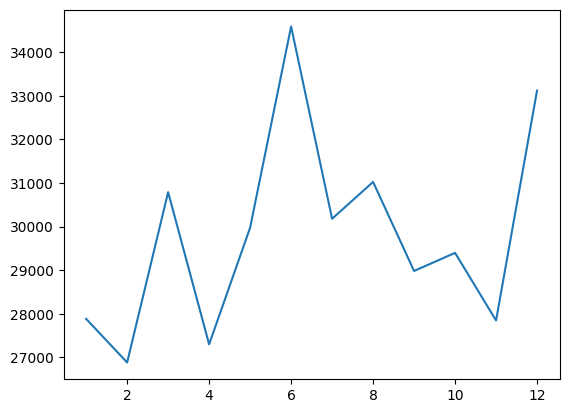

In [18]:
df.sale_date_datetime.dt.month.value_counts().sort_index().plot()

## Hm. How about years? Is there a pattern there?

I'd like to see a bar chart (columns) of number of homes sold each year.

<AxesSubplot: >

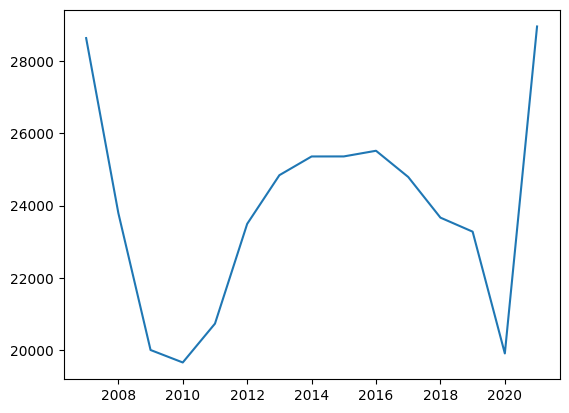

In [19]:
df.sale_date_datetime.dt.year.value_counts().sort_index().plot()

## That really reminds me of the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession).

I'd like a little more detail, though, the years are just so *lumpy*. Can I see the number of house sales on a monthly basis through the whole dataset?

> I kept using `colname.count()` when we did this in class, which was a horrible habit of mine in like 2016. I got smarter later, and realized you can just use `.size()` to count the number of rows in each group.

And please make sure the x axis starts at zero. It's really a misrepresentation of the truth if it starts at 750 or whatever matplotlib wants to do by default.

<AxesSubplot: xlabel='sale_date_datetime'>

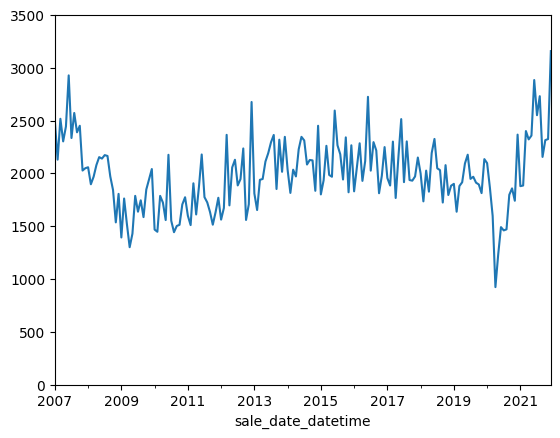

In [24]:
# Assuming it should be the y axis.

df.resample('M', on='sale_date_datetime').size().plot(ylim=(0,3500))

## That's still kind of rough. Can we smooth it out some more?

I'd like to move from monthly house sales to something a little more spread out. Here are some frequency options from the pandas documentation:

```
B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds
```

On top of just picking a frequency by itself, you can also add numbers! For example, `3A` is three years at a time, and `15D` is 15 days, etc. Maybe you could put that to use?

<AxesSubplot: xlabel='sale_date_datetime'>

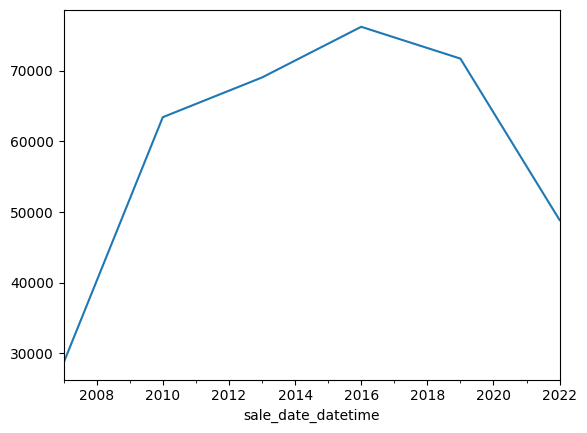

In [31]:
df.resample('3Y', on='sale_date_datetime').size().plot()

Can you think of a better option than bundling this information in groups like this? Maybe from the cherry trees homework?

In [ ]:
# rolling date !

## But what about prices?

I'm also pretty confident that 

<AxesSubplot: xlabel='sale_date_datetime'>

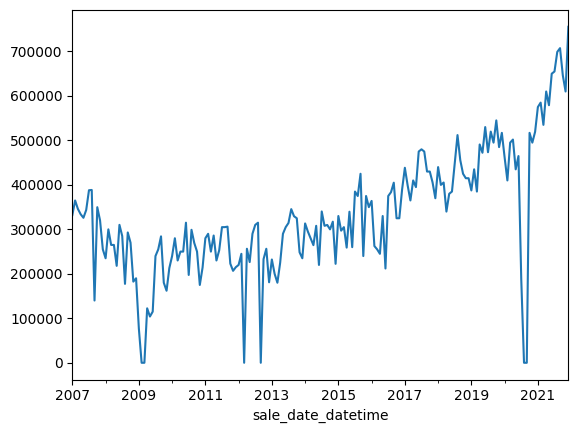

In [33]:
df.resample('M', on='sale_date_datetime').sale_price.median().plot()

W... wait, what? What are those months where it seems like nothing was sold, or it was all sold for zero dollars? Let's find the top 20 months for lowest median sale price.

In [34]:
df.resample('M', on='sale_date_datetime').sale_price.median().sort_values().head(20)

sale_date_datetime
2012-09-30         0.0
2020-09-30         0.0
2012-03-31         0.0
2009-02-28         0.0
2020-08-31        10.0
2009-03-31        20.0
2009-01-31     77120.0
2009-05-31    104000.0
2009-06-30    115000.0
2009-04-30    122500.0
2007-09-30    140000.0
2009-11-30    162000.0
2010-11-30    175000.0
2008-08-31    177450.0
2013-03-31    180000.0
2009-10-31    180000.0
2012-12-31    181050.0
2008-11-30    182500.0
2020-07-31    188750.0
2008-12-31    190000.0
Name: sale_price, dtype: float64

**??WHAT??**

Did any houses even sell then???? Let's look at the sales on `2012-09-30`.

In [35]:
df[df.sale_date_datetime == '2012-09-30']

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_date_datetime
84631,3,BUSHWICK,02 TWO FAMILY HOMES,1,3396,62,NaN,B2,125 WEIRFIELD STREET,NaN,...,0.0,2.0,1767.0,3180.0,1910.0,1,B2,299000,2012-09-30 00:00:00,2012-09-30
84632,3,BUSHWICK,02 TWO FAMILY HOMES,1,3396,62,NaN,B2,125 WEIRFIELD STREET,NaN,...,0.0,2.0,1767.0,3180.0,1910.0,1,B2,0,2012-09-30 00:00:00,2012-09-30
100537,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,24,NaN,G7,53 GRATTAN STREET,NaN,...,0.0,0.0,1860.0,0.0,0.0,4,Z9,0,2012-09-30 00:00:00,2012-09-30
100538,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,25,NaN,G7,51 GRATTAN STREET,NaN,...,0.0,0.0,2270.0,0.0,0.0,4,Z9,0,2012-09-30 00:00:00,2012-09-30
100539,3,WILLIAMSBURG-EAST,41 TAX CLASS 4 - OTHER,4,3003,26,NaN,G7,49 GRATTAN STREET,NaN,...,0.0,0.0,2500.0,0.0,0.0,4,Z9,0,2012-09-30 00:00:00,2012-09-30


## We've got a LOT of weird stuff going on here! There are all of these FREE houses?

Let's calculate what percent of the time sale prices are zero.

**Two approaches:**

1. The low-tech approach is calculating the size of the entire dataset, then filtering for where sale price is zero and getting the size of that subset.
2. The other approach (THAT I LOVE) takes two steps:
    - Write the "is your sale price 0?" code, but don't feed it to `df[...]` yet. It should be giving you Trues and Falses.
    - Put parens around your statement, then add `.value_counts()`. This does a `value_counts()` on your Trues and Falses, thus calculating how often it's zero and how often it isn't!!!

In [39]:
%time

(df.sale_price == 0).value_counts()

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs


False    225278
True     132699
Name: sale_price, dtype: int64

## Also, what's the "building class" thing?

I always assumed we were talking about houses, now there's this `41 TAX CLASS 4 - OTHER` thing? And when you google the addresses, they turn out to be parking lots???

**I guess we were really just making some dumb assumptions!** Let's narrow things down a bit. We'll start by looking at what the different building classes.

Look at what the most common building classes are in the dataset. There are a few columns, take a look at couple between `building_class_category` and `building_class_at_present` or `building_class_at_time_of_sale`. Maybe just check out the top 20 building classes in a sale?

In [43]:
df[['building_class_category', 'building_class_at_present', 'building_class_at_time_of_sale']].value_counts(ascending=False).head(20)

building_class_category             building_class_at_present  building_class_at_time_of_sale
13  CONDOS - ELEVATOR APARTMENTS    R4                         R4                                26134
10  COOPS - ELEVATOR APARTMENTS     D4                         D4                                19807
13 CONDOS - ELEVATOR APARTMENTS     R4                         R4                                13629
03  THREE FAMILY HOMES              C0                         C0                                12430
02  TWO FAMILY HOMES                B1                         B1                                12113
02 TWO FAMILY DWELLINGS             B1                         B1                                11833
03 THREE FAMILY DWELLINGS           C0                         C0                                10979
10 COOPS - ELEVATOR APARTMENTS      D4                         D4                                10836
03  THREE FAMILY DWELLINGS          C0                         C0                 

While R4, C0 and B1 seem like wonderful building classes, *I have no idea what they mean*. Luckily there's [a website we can go to](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html) that will tell us what each of them mean.

But also: I don't want to have to look them up all the time.

## Making those descriptions a column in our dataset

### Use `pd.read_html` to download the columns into a dataframe.

The first few rows should look like this:
    
||Building Code|Description|
|---|---|---|
0|A|ONE FAMILY DWELLINGS|
1|A0|CAPE COD|
2|A1|TWO STORIES - DETACHED SM OR MID|
3|A2|ONE STORY - PERMANENT LIVING QUARTER|

* **Tip:** It doesn't involve any fancy CSS selectors or anything.

In [67]:
desc_list = pd.read_html('https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html', header=0)

desc_df = pd.DataFrame(desc_list[0])

desc_df.head(4)



,Building Code,Description
0,A,ONE FAMILY DWELLINGS
1,A0,CAPE COD
2,A1,TWO STORIES - DETACHED SM OR MID
3,A2,ONE STORY - PERMANENT LIVING QUARTER


### Combine the codes dataframe with our original dataframe

In [70]:
merged_df = df.merge(desc_df, left_on='building_class_at_time_of_sale', right_on='Building Code')



Feel free to fix up the new column headers so they're lower-case with `_` instead of spaces, if you want.

In [72]:
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

## Let's save again, just for safety's sake

Take your merged dataset and save it as, I don't know, `merged.csv` I guess. Remember to add `index=False` so the index doesn't get saved as a column!

In [73]:
merged_df.to_csv('merged_2.csv', index=False)